In [1]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Chapter 3. Classification

In the MNIST data set, there are 70,000 images with 784 features ($28 \times 28$ pixels), where each pixel is in the range $[0, 255]$. 

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [3]:
X, y = mnist ['data'], mnist ['target']
y.shape, X.shape

((70000,), (70000, 784))

Lets take a look at an image. We need to reshape an instance (a row in data), to a $28 \times 28$ array and display it by **Matlablib's imshow()**

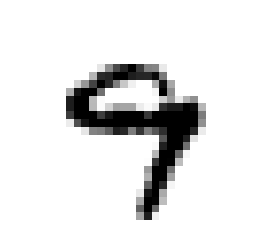

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X [54321]
some_digit_image = some_digit.reshape (28, 28)

plt.imshow (some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')

plt.axis ('off')
plt.show()

In [5]:
y [54321]

9.0

MNIST data has already split into a training set (the first 60,000 images) and a test test (the last 10,000 images).

In [6]:
X_train, X_test, y_train, y_test = X [:60 * 1000], X [60 * 1000:], y [:60 * 1000], y [60 * 1000:]

We need to shuffle our training set to make sure that cross-validation folds will yield similar results. Moreover, some ML algorithms perform poorly if they get similar instances in a row. It can be done simply with __numpy__

In [7]:
import numpy as np
shuffle_index = np.random.permutation(60 * 1000)
X_train, y_train = X_train [shuffle_index], y_train[shuffle_index]

# Training a Binary Classifier

Lets simplify the problem. Lets decise if the given image is $5$ or not $5$. 

In [8]:
y_train_5 = (y_train == 5) # y_train_5 will be True if for all 5s in y_train; otherwise, False
y_test_5 = (y_test == 5)

Lets pick a training model like **Stochastic Gradient Descent**, which is fast to deal with very large datasets.

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier (random_state=42)
sgd_clf.fit (X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [19]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

We can use __confusion matrix__ to have a more concise metric. An interesting aspect of confusion matrix is to measure __precision__ and __recall__ metrics of a classifier.
$$\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$
$$\text{Recall (also called sensitivity or true positive rate)} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$
Where __TP__ is the number of True Positives and __FN__ is the number of False Negatives.

Text(29,0.5,'Actual')

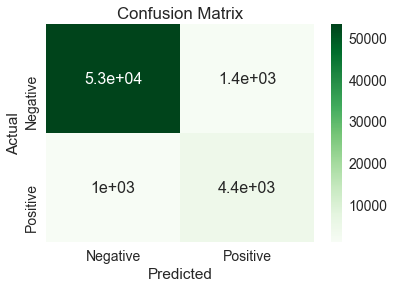

In [42]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_train_5, y_train_pred)
df_cm = pd.DataFrame(conf_mat, {'Negative', 'Positive'}, {'Negative', 'Positive'})
ax = plt.axes()
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, cmap=plt.get_cmap('Greens'), ax=ax)# font size
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

In [27]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.7629009762900977

In [28]:
recall_score(y_train_5, y_train_pred)

0.8072311381663899

It is often convenient to combine __precision__ and __recall__ metrics into a single metric called $F_1$ score. This score is a $\textit{harmonic mean}$ of precision and recall function. __Harmonic mean__ gives much more weight to low values. 
$$F_1 = \frac {2}{\frac{1}{\text{Precision}} + \frac{1}{\text{Recall}}} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = \frac{\text{TP}}{{\text{TP} + \frac{\text{FN + FP}}{2}}}$$

In [47]:
from sklearn.metrics import f1_score
f1_score (y_train_5, y_train_pred)

0.7844402617191002